Train a decision tree classifier using mushroom dataset. The nominal attributes are converted to numeric attributes. The twenty-two attributes are:

  1. cap-shape:
          Bell 0, Conical 1, Convex 2, Flat 3, Knobbed 4, Sunken 5
  2. cap-surface:
          Fibrous 0, Grooves 1, Scaly 2, Smooth 3
  3. cap-color:
          Brown 0, Buff 1, Cinnamon 2, Gray 3, Green 4, Pink 5, Purple 6, Red 7, White 8, Yellow 9
  4. bruises?:
          Bruises 0, No 1
  5. odor:
          Almond 0, Anise 1, Creosote 2, Fishy 3, Foul 4, Musty 5, None 6, Pungent 7, Spicy 8
  6. gill-attachment:
          Attached 0, Descending 1, Free 2, Notched 3
  7. gill-spacing:
          Close 0, Crowded 1, Distant 2
  8. gill-size:
          Broad 0, Narrow 1
  9. gill-color:
          Black 0, Brown 1, Buff 2, Chocolate 3, Gray 4, Green 5, Orange 6, Pink 7, Purple 8, Red 9, White 10, Yellow 11
  10. stalk-shape:
          Enlarging 0, Tapering 1
  11. stalk-root:
          Bulbous 0, Club 1, Cup 2, Equal 3, Rhizomorphs 4, Rooted 5
  12. stalk-surface-above-ring:
          Fibrous 0, Scaly 1, Silky 2, Smooth 3
  13. stalk-surface-below-ring:
          Fibrous 0, Scaly 1, Silky 2, Smooth 3
  14. stalk-color-above-ring:
          Brown 0, Buff 1, Cinnamon 2, Gray 3, Orange 4, Pink 5, Red 6, White 7, Yellow 8
  15. stalk-color-below-ring:
          Brown 0, Buff 1, Cinnamon 2, Gray 3, Orange 4, Pink 5, Red 6, White 7, Yellow 8
  16. veil-type:
          Partial 0, Universal 1
  17. veil-color:
          Brown 0, Orange 1, White 2, Yellow 3
  18. ring-number:
          None 0, One 1, Two 2
  19. ring-type:
          Cobwebby 0, Evanescent 1, Flaring 2, Large 3, None 4, Pendant 5, Sheathing 6, Zone 7
  20. spore-print-color:
          Black 0, Brown 1, Buff 2, Chocolate 3, Green 4, Orange 5, Purple 6, White 7, Yellow 8
  21. population:
          Abundant 0, Clustered 1, Numerous 2, Scattered 3, Several 4, Solitary 5
  22. habitat:
          Grasses 0, Leaves 1, Meadows 2, Paths 3, Urban 4, Waste 5, Woods 6
  Classification:
          Edible 0, Poisonous 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()

Saving agaricus-lepiota.txt to agaricus-lepiota.txt


In [ ]:
data = pd.read_csv("agaricus-lepiota.txt", sep=",")
print(data.head())

   Poisonous  CapShape  CapSurface  CapColor  Bruises  Odor  GillAttach  \
0          1         2           3         0        0     7           2   
1          0         2           3         9        0     0           2   
2          0         0           3         8        0     1           2   
3          1         2           2         8        0     7           2   
4          0         2           3         3        1     6           2   

   GillSpacing  GillSize  GillColor  ...  StalkSurfaceBelowRing  \
0            0         1          0  ...                      3   
1            0         0          0  ...                      3   
2            0         0          1  ...                      3   
3            0         1          1  ...                      3   
4            1         0          0  ...                      3   

   StalkColorAboveRing  StalkColorBelowRing  VeilType  VeilColor  RingNumber  \
0                    7                    7         0          2  

In [ ]:
data.columns

Index(['Poisonous', 'CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttach', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilType', 'VeilColor',
       'RingNumber', 'RingType', 'SporePrintColor', 'Population', 'Habitat'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Poisonous              5644 non-null   int64
 1   CapShape               5644 non-null   int64
 2   CapSurface             5644 non-null   int64
 3   CapColor               5644 non-null   int64
 4   Bruises                5644 non-null   int64
 5   Odor                   5644 non-null   int64
 6   GillAttach             5644 non-null   int64
 7   GillSpacing            5644 non-null   int64
 8   GillSize               5644 non-null   int64
 9   GillColor              5644 non-null   int64
 10  StalkShape             5644 non-null   int64
 11  StalkRoot              5644 non-null   int64
 12  StalkSurfaceAboveRing  5644 non-null   int64
 13  StalkSurfaceBelowRing  5644 non-null   int64
 14  StalkColorAboveRing    5644 non-null   int64
 15  StalkColorBelowRing    5644 non-null  

In [ ]:
data.describe()

,Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttach,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.381999,2.353650,1.457123,4.683912,0.435861,4.562013,1.993622,0.181432,0.124734,5.194543,...,2.387668,5.189227,5.129695,0.0,2.001417,1.014883,3.950390,1.467753,3.712970,3.326719
std,0.485919,0.771883,1.208440,3.388802,0.495913,1.993668,0.112776,0.385410,0.330447,3.369406,...,0.955855,2.423887,2.464314,0.0,0.037625,0.165600,1.469527,1.583470,1.328741,2.645099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,2.000000,0.000000,0.000000,3.000000,...,2.000000,3.000000,3.000000,0.0,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,0.000000,6.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,5.000000,1.000000,4.000000,4.000000
75%,1.000000,3.000000,2.000000,8.000000,1.000000,6.000000,2.000000,0.000000,0.000000,8.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,5.000000,3.000000,5.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,7.000000,2.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,5.000000,7.000000,5.000000,6.000000


In [ ]:
X = data.drop("Poisonous", axis=1)
y = data["Poisonous"]

In [ ]:
print(X)
X.columns

      CapShape  CapSurface  CapColor  Bruises  Odor  GillAttach  GillSpacing  \
0            2           3         0        0     7           2            0   
1            2           3         9        0     0           2            0   
2            0           3         8        0     1           2            0   
3            2           2         8        0     7           2            0   
4            2           3         3        1     6           2            1   
...        ...         ...       ...      ...   ...         ...          ...   
5639         0           2         0        1     6           2            0   
5640         2           2         0        1     6           2            0   
5641         2           2         3        0     6           2            0   
5642         2           2         2        1     5           2            0   
5643         3           2         2        1     5           0            0   

      GillSize  GillColor  StalkShape  

Index(['CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor', 'GillAttach',
       'GillSpacing', 'GillSize', 'GillColor', 'StalkShape', 'StalkRoot',
       'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing', 'StalkColorAboveRing',
       'StalkColorBelowRing', 'VeilType', 'VeilColor', 'RingNumber',
       'RingType', 'SporePrintColor', 'Population', 'Habitat'],
      dtype='object')

In [ ]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
5639    0
5640    0
5641    0
5642    1
5643    1
Name: Poisonous, Length: 5644, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
X_train.shape

(3386, 22)

In [ ]:
X_test.shape

(2258, 22)

In [ ]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes=10)

In [ ]:
cross_val_score(dt, X_train, y_train, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.mean(cross_val_score(dt, X_train, y_train, cv=10))

1.0

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

[Text(0.5833333333333334, 0.9375, 'SporePrintColor <= 2.0\ngini = 0.475\nsamples = 3386\nvalue = [2075, 1311]'),
 Text(0.4166666666666667, 0.8125, 'GillSize <= 0.5\ngini = 0.205\nsamples = 2256\nvalue = [1994, 262]'),
 Text(0.3333333333333333, 0.6875, 'gini = 0.0\nsamples = 1909\nvalue = [1909, 0]'),
 Text(0.5, 0.6875, 'StalkShape <= 0.5\ngini = 0.37\nsamples = 347\nvalue = [85, 262]'),
 Text(0.4166666666666667, 0.5625, 'Population <= 4.5\ngini = 0.28\nsamples = 315\nvalue = [53, 262]'),
 Text(0.3333333333333333, 0.4375, 'CapShape <= 4.0\ngini = 0.159\nsamples = 287\nvalue = [25, 262]'),
 Text(0.25, 0.3125, 'CapSurface <= 1.0\ngini = 0.12\nsamples = 280\nvalue = [18, 262]'),
 Text(0.16666666666666666, 0.1875, 'Odor <= 4.0\ngini = 0.368\nsamples = 74\nvalue = [18, 56]'),
 Text(0.08333333333333333, 0.0625, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.25, 0.0625, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0\nsamples = 206\nvalue = [0

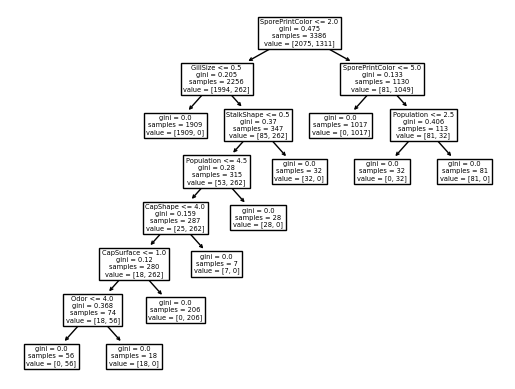

In [ ]:
tree.plot_tree(dt,feature_names=X.columns)

In [ ]:
y_pred = dt.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [ ]:
y_pred.shape

(2258,)

In [ ]:
testerror = mean_squared_error(y_test, y_pred)
print(testerror)

0.0


In [ ]:
testacc = accuracy_score(y_test, y_pred)
print(testacc)

1.0


In [ ]:
y_predtrain = dt.predict(X_train)
trainerror = mean_squared_error(y_train, y_predtrain)
print(trainerror)

0.0


In [ ]:
trainacc = accuracy_score(y_train, y_predtrain)
print(trainacc)

1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)

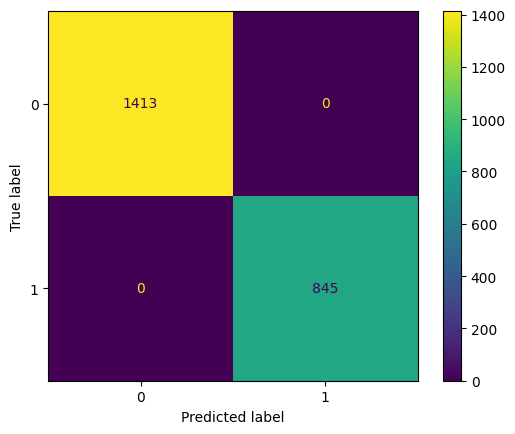

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       1.00      1.00      1.00       845

    accuracy                           1.00      2258
   macro avg       1.00      1.00      1.00      2258
weighted avg       1.00      1.00      1.00      2258

